In [13]:
import pandas as pd

billboard_df = pd.read_csv("billboard_100.csv")

genius_characters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-& '

def format_for_genius(string):
    formatted_string = ''
    for character in string:
        if character in genius_characters:
            formatted_string += character
    return formatted_string

def remove_features(string):
    for i in range(len(string)):
        if string[i:i+9] == 'featuring' or string[i:i+4] == 'with':
            string = string[:i-1]
    return string

def format_genius_lyrics(string):
    lyrics_started = False
    formatted_string = ''
    bracket_open = False

    for i in range(len(string)):
        # The string Lyricsgenius returns starts with some text about the
        # number of contributors and '[Title] lyrics', so this code makes 
        # sure it doesn't start reading until after it sees that word.
        if string[i-6:i] == 'Lyrics':
            lyrics_started = True
        # Adds all text not in brackets
        if lyrics_started is True:
            if string[i] == '[':
                bracket_open = True
            if bracket_open is False:
                formatted_string += string[i]
            if string[i] == ']':
                bracket_open = False
            if string[i+1:i+6] == 'Embed':
                lyrics_started = False

    # LyricsGenius sometimes leaves a random string of numbers right
    # before the Embed at the end, so this makes sure we get rid of those
    while True:
        if formatted_string[-1] not in '1234567890':
            break
        formatted_string = formatted_string[:-1]
    # Turn newlines into spaces to improve formatting for sentiment analysis
    formatted_string = formatted_string.replace('\n', ' ')
    
    return formatted_string





title = []
artists = []

for i in range(len(x)):
    title.append(format_for_genius(x['Title'][i]))
    artists.append(format_for_genius(remove_features(x['Artist(s)'][i])))

title_series = pd.Series(title)
artists_series = pd.Series(artists)
# '''
lyrics = []

from lyricsgenius import Genius
import api_key
import time

token = api_key.client_access_token

genius = Genius(token)

for i in range(5):
    song = genius.search_song(title_series[i], artists_series[i])
    time.sleep(.5)
    lyrics.append(format_genius_lyrics(song.lyrics))

df = pd.DataFrame({'No.':billboard_df['No.'][:5], 'Title': title_series[:5], 'Artists': artists_series[:5], 'Year': billboard_df['Year'][:5], 'Lyrics': pd.Series(lyrics)})

# print(df)
# '''    
df.to_csv('billboard_with_lyrics', encoding='utf-8', index=False)    






NameError: name 'x' is not defined

In [3]:
import helpers
import pandas as pd

billboard_df = pd.read_csv("billboard_100.csv")
[title, artists] = helpers.generate(billboard_df)
print(title)

['Thrift Shop', 'Blurred Lines', 'Radioactive', 'Harlem Shake', 'Cant Hold Us', 'Mirrors', 'Just Give Me a Reason', 'When I Was Your Man', 'Cruise', 'Roar', 'Locked Out of Heaven', 'Ho Hey', 'Stay', 'Get Lucky', 'Royals', 'I Knew You Were Trouble', 'We Cant Stop', 'Wrecking Ball', 'Wake Me Up', 'Suit and Tie', 'Cups Pitch Perfects When Im Gone', 'Holy Grail', 'Scream and Shout', 'Clarity', 'Sail', 'Dont You Worry Child', 'Diamonds', 'I Love It', 'Safe and Sound', 'Treasure', 'The Way', 'Started from the Bottom', 'Come and Get It', 'Hold On Were Going Home', 'Daylight', 'Feel This Moment', 'Applause', 'One More Night', 'Love Me', 'My Songs Know What You Did in the Dark Light Em Up', 'Fuckin Problems', 'Beauty and a Beat', 'Same Love', 'Sweet Nothing', 'Summertime Sadness', 'Home', 'Its Time', 'Power Trip', 'Girl on Fire', 'Heart Attack', 'Love Somebody', 'I Will Wait', 'Try', 'Wagon Wheel', 'Gangnam Style', 'I Need Your Love', 'Die Young', 'Some Nights', 'Bad', 'Boys Round Here', 'Gone 

In [20]:
import pandas as pd
from lyricsgenius import Genius

import helpers
import api_key

genius = Genius(api_key.client_access_token)
billboard_df = pd.read_csv("billboard_100.csv")

[artists] = helpers.generate(billboard_df)

artists_series = pd.Series(artists)
lyrics = []
num_songs = 30

for i in range(num_songs):
    while True:
        try:
            song = genius.search_song(billboard_df['Title'][i], artists_series[i])
            break
        except:
            pass
    lyrics.append(helpers.format_genius_lyrics(song.lyrics))

df = pd.DataFrame(
    {
        "No.": billboard_df["No."][:num_songs],
        "Title": billboard_df['Title'][:num_songs],
        "Artists": artists_series[:num_songs],
        "Year": billboard_df["Year"][:num_songs],
        "Lyrics": pd.Series(lyrics),
    }
)

df.to_csv("billboard_data_with_lyrics_2", encoding="utf-8", index=False)

Searching for "Thrift Shop" by Macklemore and Ryan Lewis...
Done.
Searching for "Blurred Lines" by Robin Thicke...
Done.
Searching for "Radioactive" by Imagine Dragons...
Done.
Searching for "Harlem Shake" by Baauer...
Done.
Searching for "Can't Hold Us" by Macklemore and Ryan Lewis...
Done.
Searching for "Mirrors" by Justin Timberlake...
Done.
Searching for "Just Give Me a Reason" by Pink...
Done.
Searching for "When I Was Your Man" by Bruno Mars...
Done.
Searching for "Cruise" by Florida Georgia Line...
Done.
Searching for "Roar" by Katy Perry...
Done.
Searching for "Locked Out of Heaven" by Bruno Mars...
Done.
Searching for "Ho Hey" by The Lumineers...
Done.
Searching for "Stay" by Rihanna...
Done.
Searching for "Get Lucky" by Daft Punk...
Done.
Searching for "Royals" by Lorde...
Done.
Searching for "I Knew You Were Trouble" by Taylor Swift...
Done.
Searching for "We Can't Stop" by Miley Cyrus...
Done.
Searching for "Wrecking Ball" by Miley Cyrus...
Done.
Searching for "Wake Me Up" 

[0.48810363636363635, 0.2360072727272727, 0.3990490909090909, 0.17267818181818181, 0.379630909090909, 0.20084, 0.4444927272727274, 0.32266000000000006, 0.14055999999999996, 0.14794000000000002, 0.4682818181818182, 0.2565527272727273, 0.3407109090909091, 0.5672581818181819, 0.40072, 0.2590109090909091, 0.27617636363636366, 0.16998181818181818, 0.33677636363636365, 0.2055381818181818]


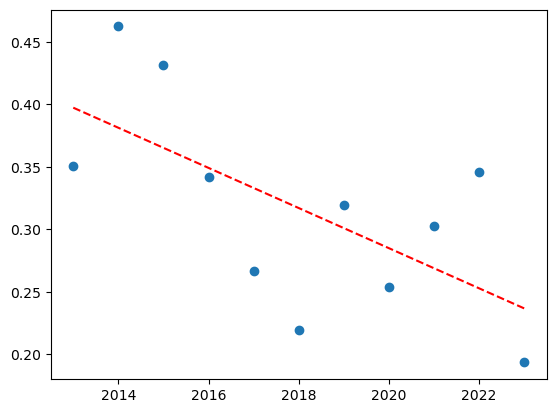

In [29]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

# nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

loaded_data = pd.read_csv('billboard_data_with_lyrics')

lyrics_data = all_data['Lyrics']

positivity_scores = []
entry_number = []

for i in range(len(lyrics_data)):
    lyrics = lyrics_data[i]
    positivity_scores.append(analyzer.polarity_scores(lyrics_data[i])['compound'])
    entry_number.append(i)

all_data = pd.concat([loaded_data, pd.DataFrame({'Positivity':positivity_scores})],axis=1)

# print(all_data)

positivity_by_position = [0]*100

for i in range(len(all_data)):
    positivity_by_position[all_data['No.'][i]-1] += 1/11 * all_data['Positivity'][i]

adj_positivity_by_position = []

for i in range(20):
    adj_positivity_by_position.append(sum(positivity_by_position[i*5:i*5+5])/5)

print(adj_positivity_by_position)

# plt.scatter(range(1, 21), adj_positivity_by_position)
# z = np.polyfit(range(1,21), adj_positivity_by_position, 1)
# p = np.poly1d(z)
# plt.plot(range(1,21),p(range(1,21)),"r--")

scores = [sum(positivity_scores[:101])/100, sum(positivity_scores[100:201])/100, sum(positivity_scores[200:301])/100, sum(positivity_scores[300:401])/100, sum(positivity_scores[400:501])/100, sum(positivity_scores[500:601])/100, sum(positivity_scores[600:701])/100, sum(positivity_scores[700:801])/100, sum(positivity_scores[800:901])/100, sum(positivity_scores[900:1001])/100, sum(positivity_scores[1000:1101])/100]
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
plt.scatter(years, scores)
z = np.polyfit(years, scores, 1)
p = np.poly1d(z)
plt.plot(years,p(years),"r--")

# print(lyrics)

# scores = analyzer.polarity_scores(lyrics_data[0])['compound']
# print(scores)


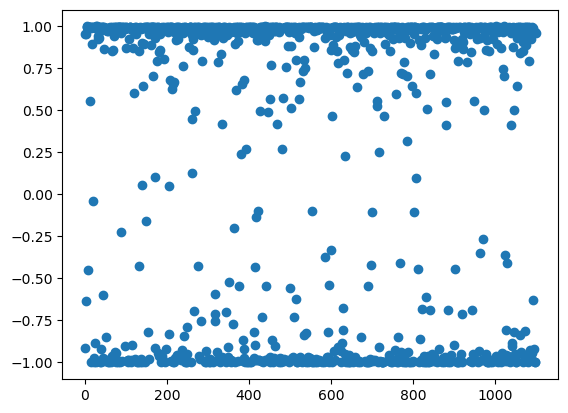

In [31]:
plt.scatter(range(len(all_data)), positivity_scores)

Things we could investigate:
Lyrical complexity - has the number of unique words on average increased?
Increased use of other languages - has the number of words not in the english dictionary increased?

Tooltip show every song
